## Introduction

This is exmaple code to open an ABF file, extract action-potentials and plot the results. We load ABF files using pyABF:
    https://github.com/swharden/pyABF

In [16]:
# import python libraries
import numpy as np
import matplotlib.pyplot as plt

import pyabf

%matplotlib notebook

In [17]:
# define some functions
def bLoadFile(filename = ''):
    '''
    Load an abf file
    '''
    if not filename:
        filename = 'data/171116sh_0018.abf'
    abf = pyabf.ABF(filename)
    return abf

def _where_cross(data,threshold):
    """return a list of Is where the data first crosses above threshold."""
    Is=np.where(data>threshold)[0]
    Is=np.concatenate(([0],Is))
    Ds=Is[:-1]-Is[1:]+1
    return Is[np.where(Ds)[0]+1]

def bSpikeDetect(abf, sweepNumber, dVthresholdPos=15):
    abf.setSweep(sweepNumber)

    # calculate first derivative
    sweepDeriv = np.diff(abf.sweepY)

    # scale it to V/S (mV/ms)
    sweepDeriv = sweepDeriv * abf.dataRate / 1000

    # determine where crossings occur
    crossings = _where_cross(sweepDeriv,dVthresholdPos)
   
    return crossings

def bPlotSweep(abf, sweepNumber, spikeTimes=None):
    '''
    Plot both voltage (mV) and current (pA) for a given sweep.
    Optionally append spike times.
    '''
    abf.setSweep(sweepNumber)
    
    fig = plt.figure()

    # plot the ADC (voltage recording)
    ax1 = fig.add_subplot(211)
    #ax1.set_title("ADC (recorded waveform)")
    ax1.plot(abf.sweepX, abf.sweepY)

    if spikeTimes is not None:
        for spikeTime in spikeTimes:
            ax1.plot(abf.sweepX[spikeTime], abf.sweepY[spikeTime], 'or')
        
    # plot the DAC (clamp current)
    ax2 = fig.add_subplot(212, sharex=ax1)  # <-- this argument is new
    #ax2.set_title("DAC (stimulus waveform)")
    ax2.plot(abf.sweepX, abf.sweepC, color='r')

    # decorate the plots
    ax1.set_ylabel(abf.sweepLabelY)
    ax2.set_xlabel(abf.sweepLabelX)
    ax2.set_ylabel(abf.sweepLabelC)
    #ax1.axes.set_xlim(1.25, 2.5)  # <-- adjust axis like this
    ax1.axes.set_xlim(0.1, 0.8)
    
    plt.show()

In [18]:
abf = bLoadFile()
print(abf)

ABF (version 2.6.0.0) with 1 channel (mV), sampled at 20.0 kHz, containing 17 sweeps, having no tags, with a total length of 0.90 minutes, recorded with protocol "L:\Protocols\permanent\0113 steps dual -100 to 300 step 25".


<IPython.core.display.Javascript object>


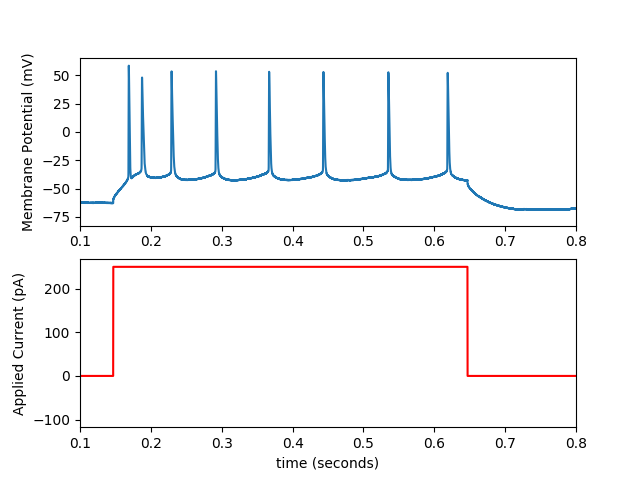

In [19]:
sweepNumber = 14
fig = bPlotSweep(abf, sweepNumber)

## Spike Detection

abf.dataRate: 20000


<IPython.core.display.Javascript object>


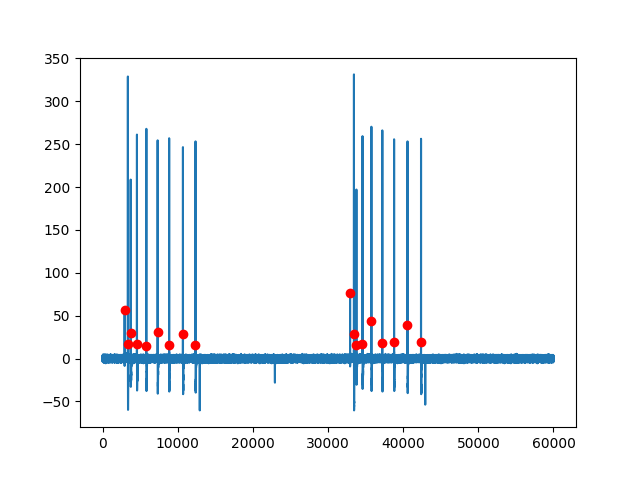

[ 2937  3365  3737 ... 38787 40575 42371]


In [20]:
# calculate first derivative
sweepDeriv = np.diff(abf.sweepY)

# scale it to V/S (mV/ms)
print('abf.dataRate:', abf.dataRate)
sweepDeriv = sweepDeriv * abf.dataRate / 1000

# determine where crossings occur
dVthresholdPos = 15
crossings = _where_cross(sweepDeriv,dVthresholdPos)

plt.figure()
plt.plot(sweepDeriv)

for crossing in crossings:
    plt.plot(crossing, sweepDeriv[crossing], 'or')

plt.show()

print(crossings)

<IPython.core.display.Javascript object>


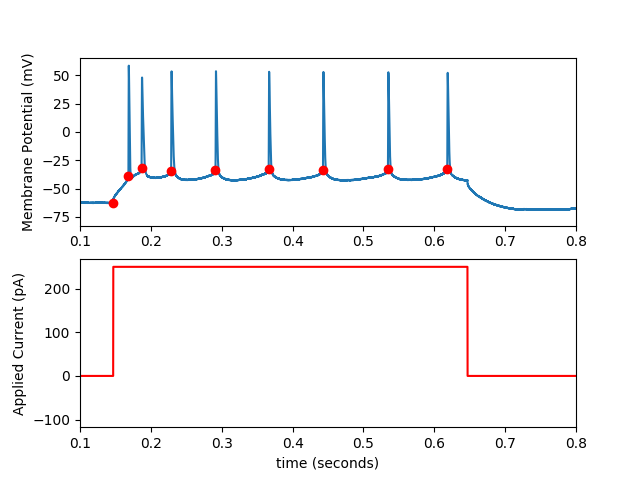

In [21]:
bPlotSweep(abf, sweepNumber, spikeTimes=crossings)

## Plot with plotly

In [22]:
#import plotly.plotly as py
#import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

sweepNumber = 14
abf.setSweep(sweepNumber)

print(len(abf.sweepX))

trace0 = go.Scatter(
    x = abf.sweepX,
    y = abf.sweepY
)

trace2 = go.Scatter(
    x = abf.sweepX[crossings],
    y = abf.sweepY[crossings],
    mode='markers',
    marker=dict(color='red', size=7)
)

data = [trace0, trace2]

iplot(data, filename='basic-line')


60000


## Plot with interactive widgets

In [23]:
from ipywidgets import interact

def bPlotSweep2(sweepNumber):

    crossings = bSpikeDetect(abf, sweepNumber)
    bPlotSweep(abf, sweepNumber, crossings)

interact(bPlotSweep2, sweepNumber=abf.sweepList)

interactive(children=(Dropdown(description='sweepNumber', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1…

<function __main__.bPlotSweep2(sweepNumber)>